In [73]:
import glob
import json
import os
import numpy as np
import pandas as pd

In [43]:
results_filenames = glob.glob("../results/*.json")
results_filenames = [filename for filename in results_filenames if "clip" not in filename]
print(results_filenames)

['../results/lstm_seed_1_image_eval_filtered_dev_predictions.json', '../results/lstm_seed_2_image_eval_filtered_dev_predictions.json', '../results/embedding_seed_0_image_eval_filtered_dev_predictions.json', '../results/embedding_seed_1_image_eval_filtered_dev_predictions.json', '../results/embedding_seed_2_image_eval_filtered_dev_predictions.json', '../results/lstm_seed_0_image_eval_filtered_dev_predictions.json', '../results/embedding_seed_0_image_eval_filtered_dev_9_foils_predictions.json', '../results/embedding_seed_1_image_eval_filtered_dev_9_foils_predictions.json', '../results/embedding_seed_2_image_eval_filtered_dev_9_foils_predictions.json', '../results/embedding_seed_0_image_eval_filtered_dev_21_foils_predictions.json', '../results/embedding_seed_1_image_eval_filtered_dev_21_foils_predictions.json', '../results/embedding_seed_2_image_eval_filtered_dev_21_foils_predictions.json', '../results/embedding_seed_0_text_eval_filtered_dev_predictions.json', '../results/embedding_seed_1

In [44]:
results = []
for filename in results_filenames:
    with open(filename) as f:
        data = json.load(f)
        
    result_df = pd.DataFrame(data["data"])
    
    # add additional columns
    if "image" in filename:
        result_df["eval_type"] = "image"
    elif "text" in filename:
        result_df["eval_type"] = "text"
        
    if "embedding" in filename:
        result_df["model"] = "embedding"
    elif "lstm" in filename:
        result_df["model"] = "lstm"
        
    if "9_foils" in filename:
        result_df["n_foils"] = 9
    elif "21_foils" in filename:
        result_df["n_foils"] = 21
    else:
        result_df["n_foils"] = 3
        
    if "seed_0" in filename:
        result_df["seed"] = 0
    elif "seed_1" in filename:
        result_df["seed"] = 1
    elif "seed_2" in filename:
        result_df["seed"] = 2
        
    result_df['target_category'] = result_df['categories'].str[0]

    results.append(result_df)

In [45]:
results_df = pd.concat(results)
eval_results_by_category = results_df.groupby(['model', 'target_category', 'seed', 'n_foils', 'eval_type']).mean('correct').reset_index()
print(eval_results_by_category)

         model target_category  seed  n_foils eval_type  trial_idx  pred  \
0    embedding            ball     0        3     image       49.5  0.53   
1    embedding            ball     0        3      text       49.5  0.32   
2    embedding            ball     0        9     image       49.5  2.90   
3    embedding            ball     0        9      text       49.5  2.39   
4    embedding            ball     0       21     image       49.5  7.93   
..         ...             ...   ...      ...       ...        ...   ...   
787       lstm          window     2        3      text     2149.5  0.63   
788       lstm          window     2        9     image     2149.5  2.73   
789       lstm          window     2        9      text     2149.5  3.42   
790       lstm          window     2       21     image     2149.5  7.55   
791       lstm          window     2       21      text     2149.5  7.56   

     correct  
0       0.77  
1       0.85  
2       0.40  
3       0.54  
4       0.30

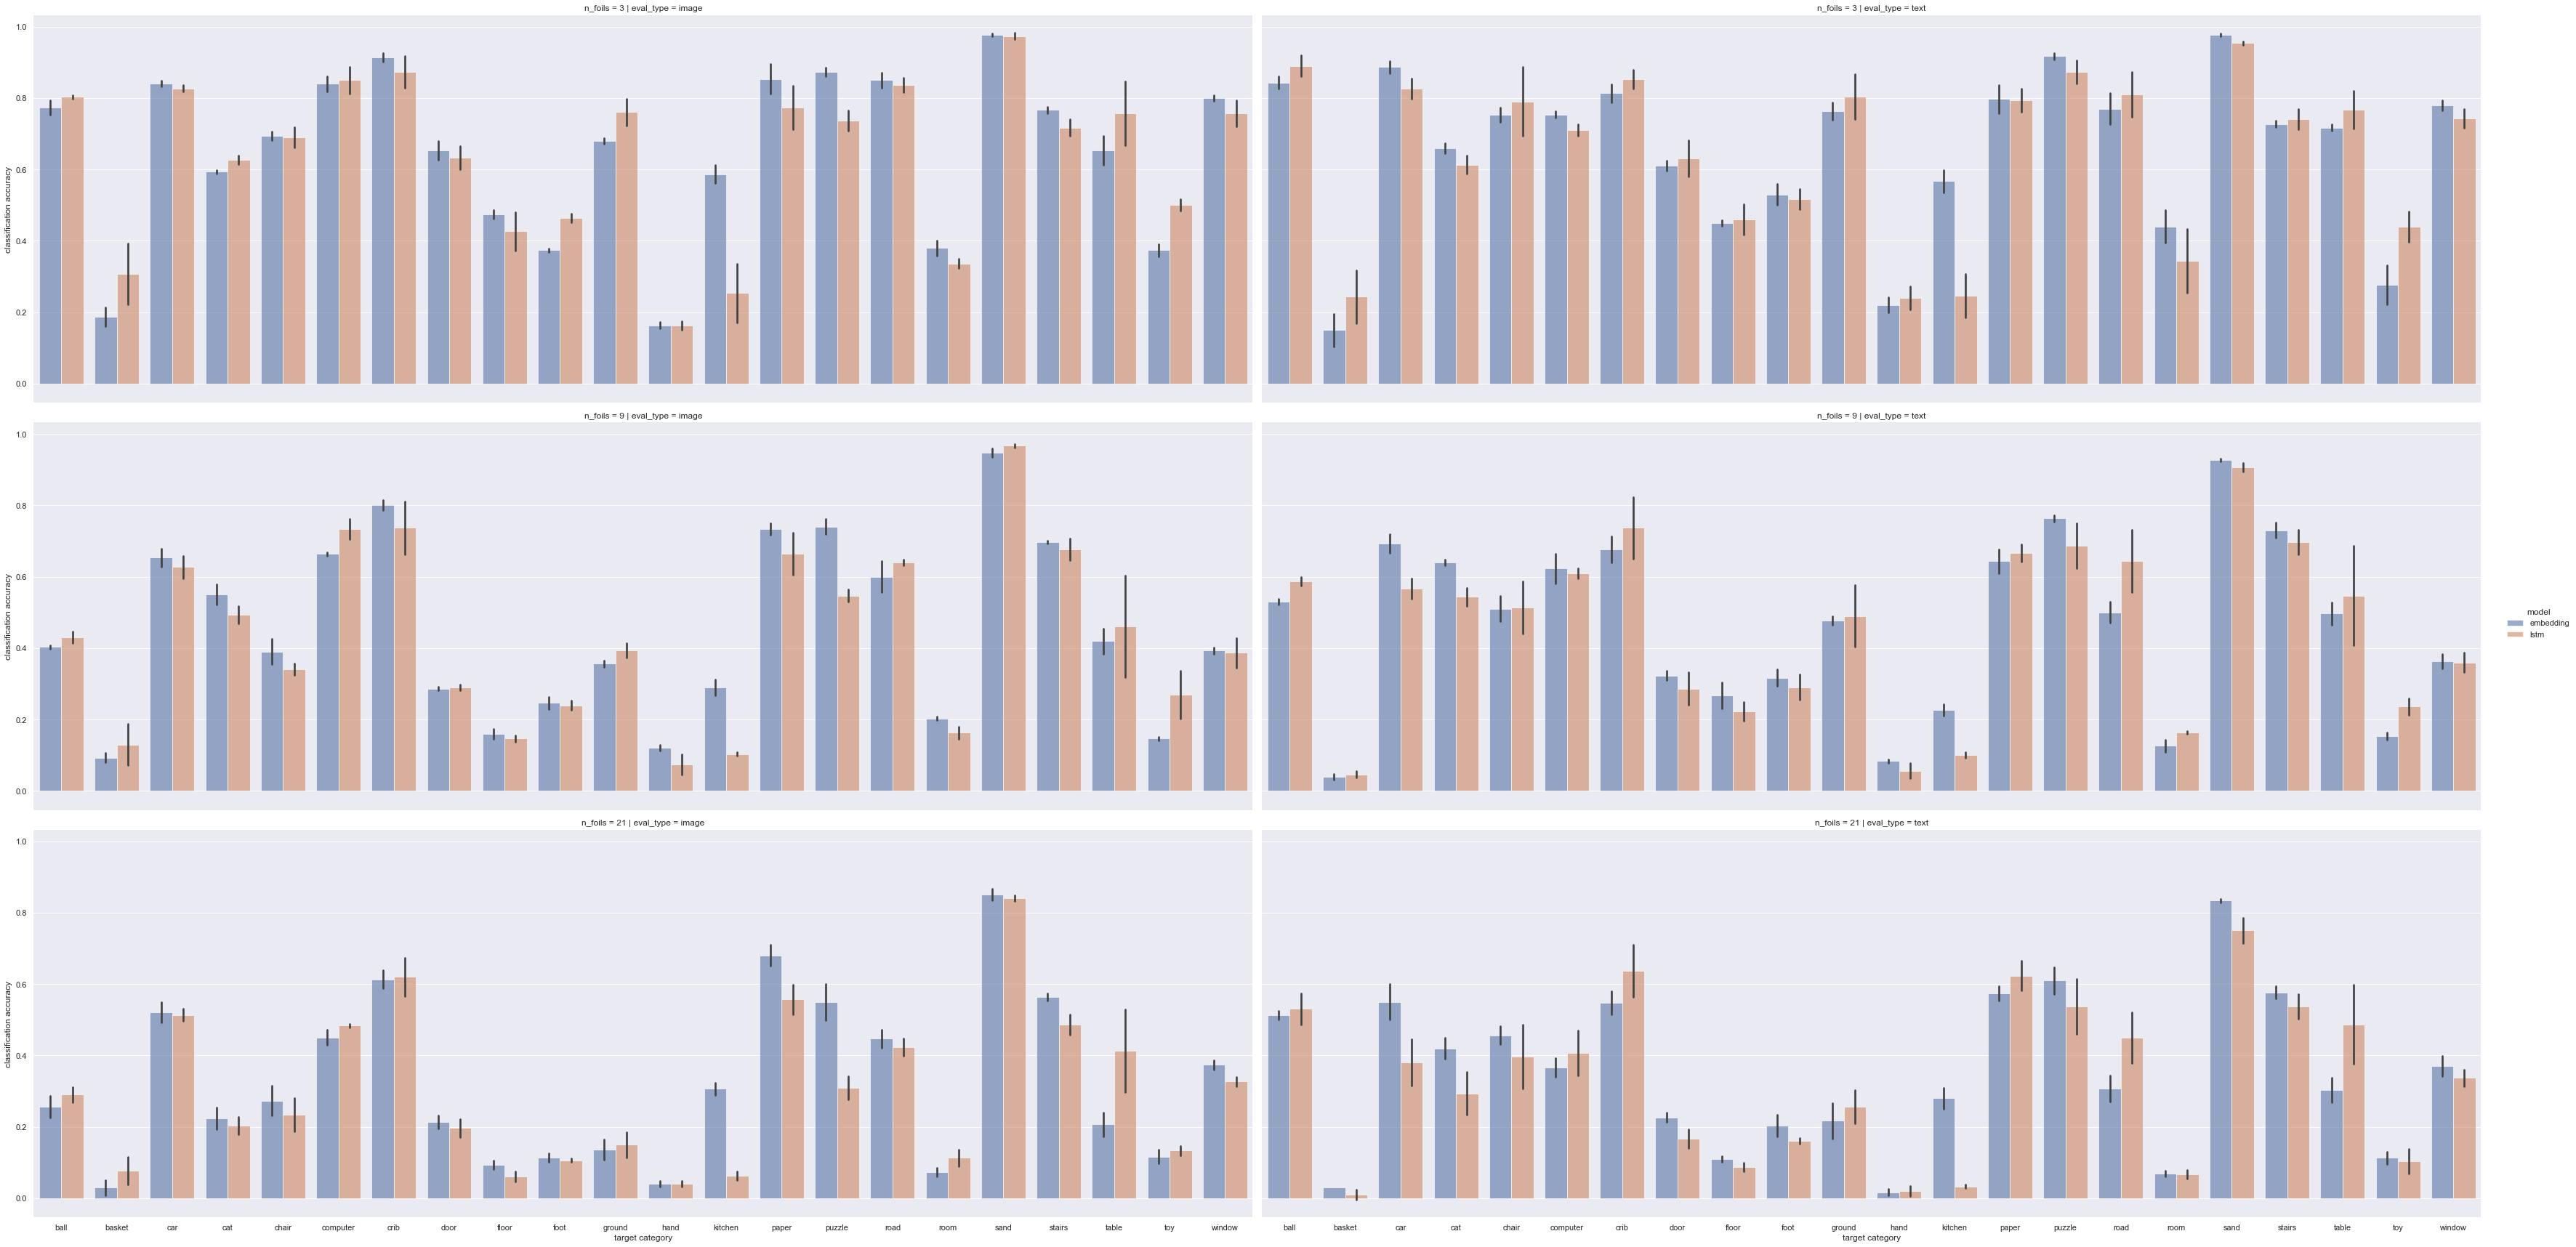

In [46]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(5,100)})

g = sns.catplot(
    data=eval_results_by_category, kind="bar",
    x="target_category", y="correct", hue="model",
    ci="sd", alpha=.6, height=8, aspect=3, row='n_foils', col='eval_type'
)
g.despine(left=True)
g.set_axis_labels("target category", "classification accuracy")

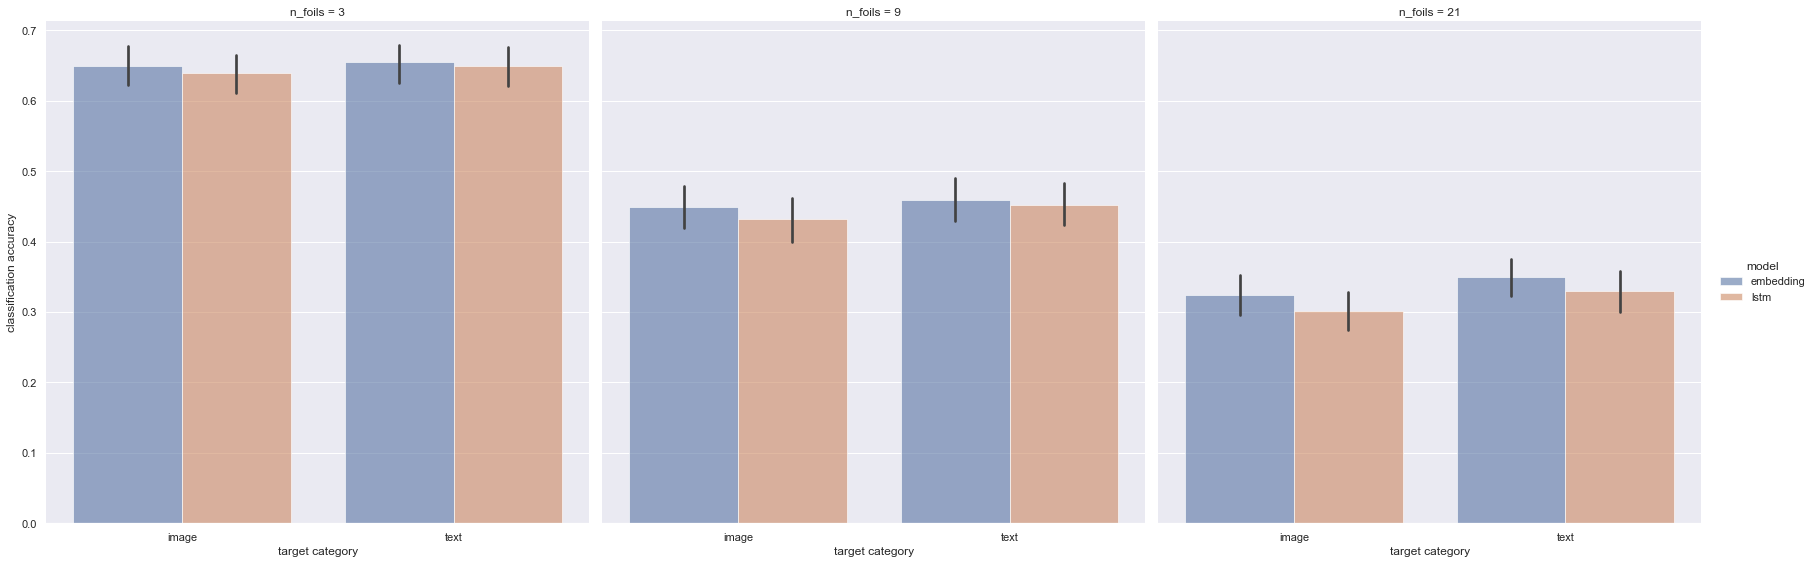

In [47]:
eval_results = results_df.groupby(['model', 'seed', 'n_foils', 'eval_type']).mean('correct').reset_index()

g = sns.catplot(
    data=eval_results_by_category, kind="bar",
    x="eval_type", y="correct", hue="model",
    ci=68, alpha=.6, height=8, aspect=1, col='n_foils'
)
g.despine(left=True)
g.set_axis_labels("target category", "classification accuracy")

In [64]:
# using pandas: get the value from the categories column based on the value of pred in results_df
results_df['pred_category'] = results_df.apply(lambda row: row['categories'][row['pred']], axis=1)

# results_df['pred_category'] = results_df['categories'].str[results_df['pred']]
results_df.head(20)

,checkpoint,seed,trial_idx,categories,logits,pred,correct,eval_type,model,n_foils,target_category,pred_category
0,multimodal_text_encoder_lstm_embedding_dim_512...,1,0,"[ball, kitchen, hand, room]","[0.9549552798271179, 0.00911189429461956, 0.01...",0,True,image,lstm,3,ball,ball
1,multimodal_text_encoder_lstm_embedding_dim_512...,1,1,"[ball, road, paper, floor]","[0.17390641570091248, 0.0076918345876038074, 0...",3,False,image,lstm,3,ball,floor
2,multimodal_text_encoder_lstm_embedding_dim_512...,1,2,"[ball, window, puzzle, chair]","[0.6753633618354797, 0.262797087430954, 0.0259...",0,True,image,lstm,3,ball,ball
3,multimodal_text_encoder_lstm_embedding_dim_512...,1,3,"[ball, car, cat, sand]","[0.937690794467926, 0.02419588901102543, 0.027...",0,True,image,lstm,3,ball,ball
4,multimodal_text_encoder_lstm_embedding_dim_512...,1,4,"[ball, hand, door, foot]","[0.7874106168746948, 0.1319512575864792, 0.054...",0,True,image,lstm,3,ball,ball
5,multimodal_text_encoder_lstm_embedding_dim_512...,1,5,"[ball, floor, foot, door]","[0.8746422529220581, 0.052893467247486115, 0.0...",0,True,image,lstm,3,ball,ball
6,multimodal_text_encoder_lstm_embedding_dim_512...,1,6,"[ball, car, window, crib]","[0.8549922704696655, 0.006727398838847876, 0.0...",0,True,image,lstm,3,ball,ball
7,multimodal_text_encoder_lstm_embedding_dim_512...,1,7,"[ball, computer, cat, paper]","[0.08273332566022873, 0.04726501926779747, 0.3...",3,False,image,lstm,3,ball,paper
8,multimodal_text_encoder_lstm_embedding_dim_512...,1,8,"[ball, crib, road, computer]","[0.8150006532669067, 0.015806041657924652, 0.0...",0,True,image,lstm,3,ball,ball
9,multimodal_text_encoder_lstm_embedding_dim_512...,1,9,"[ball, basket, stairs, car]","[0.7719661593437195, 0.15703445672988892, 0.06...",0,True,image,lstm,3,ball,ball


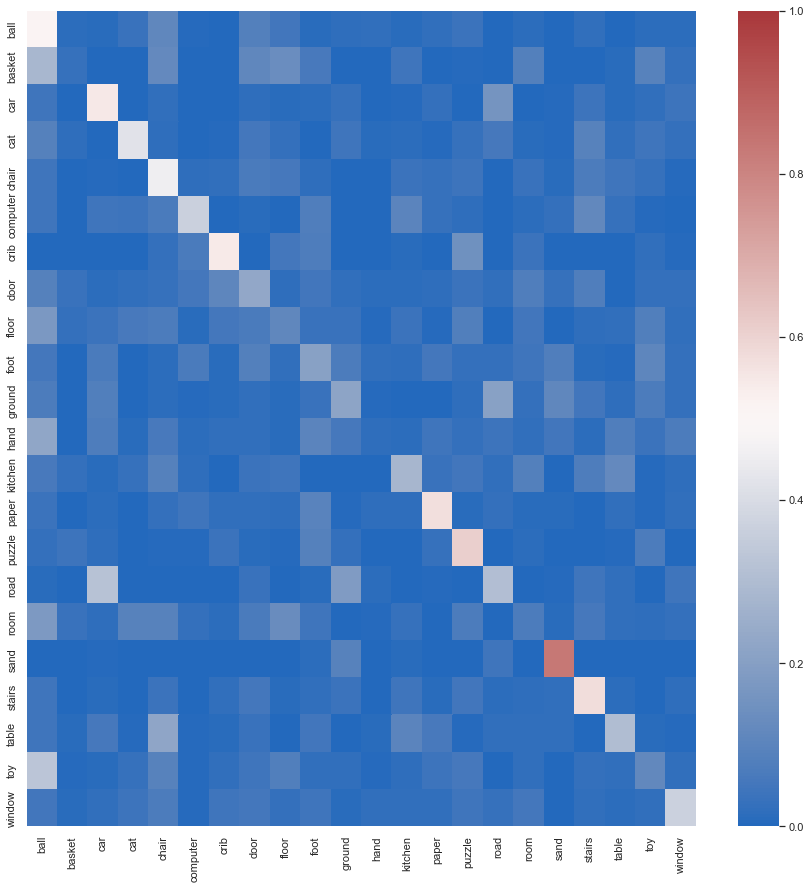

In [107]:
# get a subset of results
results_subset = results_df[(results_df['model'] == 'embedding') & (results_df['eval_type'] == 'text') & (results_df['n_foils'] == 21)]
eval_categories = results_df['target_category'].unique().tolist()

confusion_mat = np.zeros((len(eval_categories), len(eval_categories)))
for idx, row in results_subset.iterrows():
    correct_idx = eval_categories.index(row['target_category'])
    pred_idx = eval_categories.index(row['pred_category'])
    confusion_mat[correct_idx, pred_idx] += 1
    
# normalize across rows
confusion_mat /=  confusion_mat.sum(axis=1)[:,np.newaxis]
    
sns.set(rc = {'figure.figsize':(15,15)})
ax = sns.heatmap(confusion_mat, cmap="vlag", xticklabels=eval_categories, yticklabels=eval_categories, vmin=0, vmax=1)